In [37]:
import numpy as np
import cv2
import h5py


from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend
import tensorflow as tf


import string
import matplotlib.pyplot as plt

In [38]:
raw_imgs = np.load('/home/fizzer/ros_ws/src/controller_pkg/cnn_trainer/plates/pnum_imgs.npy')
raw_labels = np.load('/home/fizzer/ros_ws/src/controller_pkg/cnn_trainer/plates/pnum_labels.npy')
print(raw_imgs.shape)
print(raw_labels.shape)

(4000, 150, 100)
(4000,)


6
(150, 100)


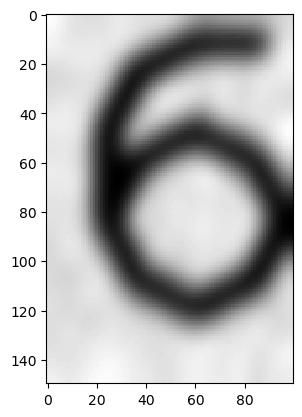

In [39]:
p = np.random.permutation(raw_imgs.shape[0])
raw_imgs=raw_imgs[p]
raw_labels=raw_labels[p]
print(raw_labels[10])
print(raw_imgs[10].shape)
plt.imshow(raw_imgs[10], cmap='gray')

In [40]:
labels_to_int=dict(zip([1,2,3,4,5,6,7,8],[0,1,2,3,4,5,6,7]))
int_to_labels=dict(zip([0,1,2,3,4,5,6,7],[1,2,3,4,5,6,7,8]))
imgs=raw_imgs[...,np.newaxis]/255
labels = np.array([labels_to_int[l] for l in raw_labels])
print(imgs.shape)
print(labels.shape)

(4000, 150, 100, 1)
(4000,)


In [41]:
# Commented out a bunch of the layers because our model can be much simpler.

conv_model = models.Sequential()
conv_model.add(layers.Conv2D(2, (8, 8), strides=4,activation='relu',
                             input_shape=(150, 100,1)))
conv_model.add(layers.MaxPooling2D((4, 4)))
conv_model.add(layers.Dropout(0.5))
# conv_model.add(layers.Conv2D(16, (3, 3), activation='relu'))
# conv_model.add(layers.MaxPooling2D((4, 4)))
# conv_model.add(layers.Dropout(0.5))
# conv_model.add(layrs.Conv2D(128, (3, 3), activation='relu'))
# conv_model.add(layers.MaxPooling2D((2, 2)))
# conv_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Flatten())
conv_model.add(layers.Dropout(0.5))
conv_model.add(layers.Dense(64, activation='relu'))
conv_model.add(layers.Dense(8, activation='softmax'))

conv_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 36, 24, 2)         130       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 9, 6, 2)          0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 9, 6, 2)           0         
                                                                 
 flatten_5 (Flatten)         (None, 108)               0         
                                                                 
 dropout_11 (Dropout)        (None, 108)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                6976      
                                                      

In [42]:
# Used sparse categorical crossentropy so because it automatically performs one-hot-encoding
# So that we don't have to do it ourselves.

LEARNING_RATE = 1e-4
conv_model.compile(loss='sparse_categorical_crossentropy',
                   optimizer=optimizers.RMSprop(learning_rate=LEARNING_RATE),
                   metrics=['acc'])

In [43]:
history_conv = conv_model.fit(imgs, labels, 
                              validation_split=0.2, 
                              epochs=10, 
                              batch_size=4)

Epoch 1/10
800/800 [==============================] - 2s 2ms/step - loss: 2.0689 - acc: 0.1741 - val_loss: 1.9948 - val_acc: 0.3825
Epoch 2/10
800/800 [==============================] - 1s 2ms/step - loss: 1.9381 - acc: 0.2891 - val_loss: 1.7964 - val_acc: 0.6850
Epoch 3/10
800/800 [==============================] - 1s 2ms/step - loss: 1.7063 - acc: 0.4197 - val_loss: 1.3912 - val_acc: 0.8537
Epoch 4/10
800/800 [==============================] - 1s 2ms/step - loss: 1.3671 - acc: 0.5834 - val_loss: 0.9136 - val_acc: 0.9162
Epoch 5/10
800/800 [==============================] - 1s 2ms/step - loss: 1.0682 - acc: 0.6612 - val_loss: 0.5599 - val_acc: 0.9950
Epoch 6/10
800/800 [==============================] - 1s 2ms/step - loss: 0.8379 - acc: 0.7259 - val_loss: 0.3522 - val_acc: 0.9987
Epoch 7/10
800/800 [==============================] - 1s 2ms/step - loss: 0.6744 - acc: 0.7966 - val_loss: 0.2337 - val_acc: 1.0000
Epoch 8/10
800/800 [==============================] - 1s 2ms/step - loss: 0.

In [27]:
pnums = np.load('/home/fizzer/ros_ws/src/controller_pkg/cnn_trainer/plates/pnums.npy', allow_pickle=True)

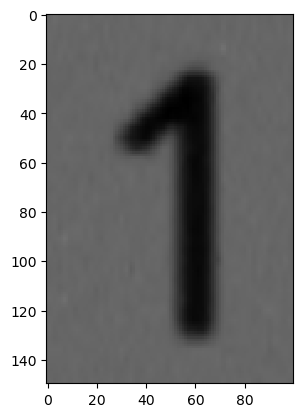

In [44]:
one = cv2.imread('/home/fizzer/Pictures/one.png')
one.shape
plt.imshow(one)

In [45]:
one=cv2.cvtColor(one, cv2.COLOR_BGR2GRAY)[...,np.newaxis][np.newaxis,...]/255
prob = conv_model(one)
print(prob)
print(int_to_labels[np.argmax(prob)])

tf.Tensor(
[[0.764184   0.00802393 0.0040913  0.16449252 0.01012762 0.01596222
  0.03143573 0.00168265]], shape=(1, 8), dtype=float32)
1


In [46]:
conv_model.save('/home/fizzer/ros_ws/src/controller_pkg/cnn_trainer/pnums_model')

INFO:tensorflow:Assets written to: /home/fizzer/ros_ws/src/controller_pkg/cnn_trainer/pnums_model/assets


INFO:tensorflow:Assets written to: /home/fizzer/ros_ws/src/controller_pkg/cnn_trainer/pnums_model/assets
